In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fn = './data/臺北市固定測速照相地點表108.1.4.csv'
df = pd.read_csv(fn,engine="python")    #讀取csv檔案
df["location"] = df["location"].fillna("")       #將type欄位為""填入"未分類"
dfGroup = df.groupby("area")            #以area欄位來群組資料
areaNum = dfGroup["area"].count()       #計算各區域出現次數
areaName = list(areaNum.index)          #各區名稱 

In [2]:
def main():
    while True:
        menu1()
        choice = input("請選擇欲查詢項目:")
        print()
        if choice == 'A':
            while True:
                try:
                    menuA()                                     
                    choice2 = int(input("請選擇欲查詢區域:"))
                    print()
                    if choice2 >=1 and choice2 <=14:
                        disp_data(choice2)
                        input("請按任意鍵返回選單")
                    elif choice2 == 0:
                        break
                    else:
                        print("請輸入1~14! 請按任意鍵繼續..")
                        input("")  
                except ValueError:
                    print("\n請輸入正確的選項! 按任意鍵繼續..")
                    input("")
        elif choice == 'B':
            while True:
                try:
                    menuB()
                    choice3 = int(input("請選擇欲查詢項目:"))
                    print()
                    if choice3 == 99:
                        pltAreaNum()
                        plt.show()
                        input("請按任意鍵返回選單")
                    elif choice3 == 0:
                        break
                    else:
                        print("請輸入99查詢! 按任意鍵繼續..")
                        input("")     
                except ValueError:
                    print("\n請輸入正確的選項! 按任意鍵繼續..")
                    input("")
        elif choice == '0':
            print("返回總目錄\n")
            break
        else:
            print("請輸入A或B查詢! 按任意鍵繼續..")
            input("")

In [3]:
def menu1():
    print("---台北市固定測速照相機---")
    print("A.資料查詢")
    print("B.統計圖表")
    print("0.返回總目錄")

In [4]:
def menuA():       
    print("台北市固定測速照相機地點")
    print("---------------0.返回上一層------------------")
    for i in range(len(areaName)):
        print("{:3d}.{:>5s}區".format(i+1,areaName[i]),end="")
        if (i+1)%4 == 0:
            print("")

In [5]:
def menuB():
    print("---------------0.返回上一層------------------")
    print("99.台北市各行政區測速照相機數量")

In [6]:
def disp_data(choice2):
    dist = areaName[choice2-1]
    count = 0
    print(dist+"區固定測速照相機地點:")
    for i in range(len(df)):
        if dist == df["area"][i]:
            count += 1
            print("{}.{}\n   方向:{}; 速限:{}".
                  format(count,df['road'][i]+df['location'][i],df['direction'][i],df['speed_limit'][i]))

In [7]:
def pltAreaNum():
    plt.figure(figsize=(18,18))
    colors = ['aqua','darkred','darkgreen','b','brown','chartreuse',
              'chocolate','coral','darkblue','c','fuchsia','r','g','purple']
    plt.subplot(1,2,1)
    plt.bar(areaName,areaNum,color=colors)
    plt.title("各區測速照相機數量",size=25)
    plt.ylabel("數量(台)",size=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.subplot(1,2,2)
    explode = [0.01]*14
    patch,ltext,ptext = plt.pie(areaNum,labels=areaName,autopct="%2.1f%%",
                                explode=explode,colors=colors,pctdistance=0.8,labeldistance=1.1)
    for t in ltext:
        t.set_size(18) 
    for p in ptext:
        p.set_size(18)
    plt.axis("equal")
    plt.title("各區測速照相機比例",size=25)

---台北市固定測速照相機---
A.資料查詢
B.統計圖表
0.返回總目錄
請選擇欲查詢項目:B

---------------0.返回上一層------------------
99.台北市各行政區測速照相機數量
請選擇欲查詢項目:99



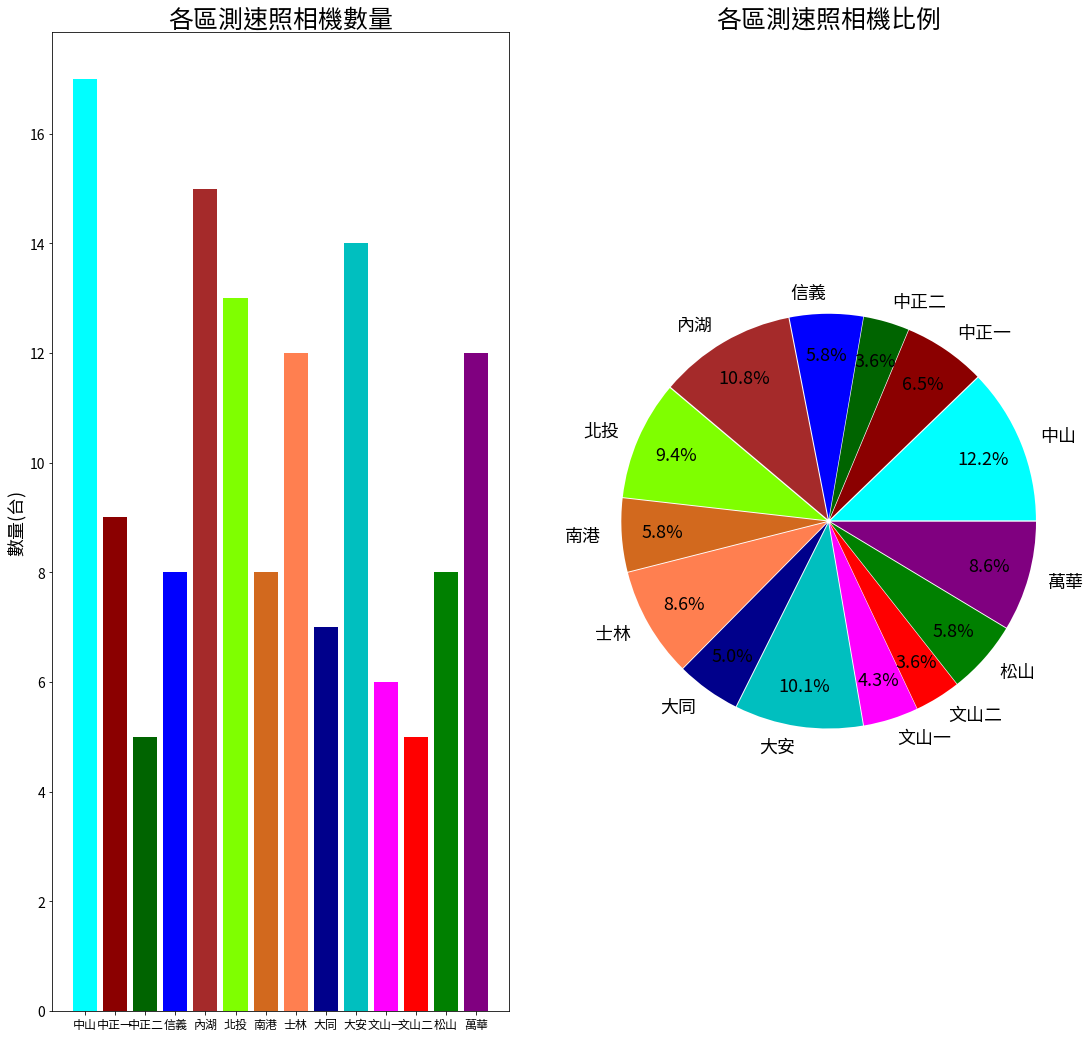

請按任意鍵返回選單0
---------------0.返回上一層------------------
99.台北市各行政區測速照相機數量
請選擇欲查詢項目:0

---台北市固定測速照相機---
A.資料查詢
B.統計圖表
0.返回總目錄
請選擇欲查詢項目:0

返回總目錄



In [8]:
main()